<a href="https://colab.research.google.com/github/GeorgeKMaina/stroke-health-care-analysis/blob/dev_samp/Stroke_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STROKE RISK FACTORS**

## Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Loading our dataset
healthdata=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
healthdata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Checking the data

In [3]:
# Determining the no. of records in our dataset
healthdata.shape

(5110, 12)

Our dataset has 5110 rows and 12 columns.


In [4]:
# previewing the top of our dataset
healthdata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# previewing the bottom of our dataset
healthdata.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# Checking whether each column has an appropriate datatype
healthdata.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Tidying the dataset

### Renaming columns

Using the same pattern for column names, i.e. using lower case and '_' to make a single word for two-word columns.

In [7]:
# Using the same format for all column names by:
# Renaming the columns to combine the names of the columns into a single word and lowering the case

healthdata.columns = healthdata.columns.str.lower().str.replace(' ', '_')

### Identifying uniques values within the dataset for each column.

In [8]:
# Are there any unique values in each column entry in the dataset?
for i in healthdata.columns:
 print(healthdata[i].unique())
 print ("\n")

[ 9046 51676 31112 ... 19723 37544 44679]


['Male' 'Female' 'Other']


[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-

### Dropping Irrelevant Fields

In [9]:
# Dropping irrelevant fields
healthdata.drop(columns =['id'],inplace = True)
healthdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Missing values

Identifying and dealing with missing values within the dataset.

In [10]:
# Determining the number of items in each column and the data type of each column
healthdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [11]:
# Identifying the Missing Data.
healthdata.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
# Dropping any rows that have a missing or null values because they may cause inconsistencies.
healthdata.dropna(inplace = True)
# Checking if there are any null values.
healthdata.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Outliers

(4909, 11)


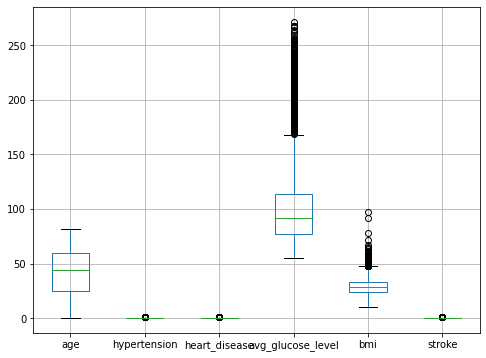

In [13]:
# checking for outliers 
healthdata.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(healthdata.shape)

In [14]:
# Checking for outliers in the glucose level column

Q1 = healthdata.avg_glucose_level.quantile(0.25)
Q3 = healthdata.avg_glucose_level.quantile(0.75)

IQR = Q3 - Q1

outliers = ((healthdata.avg_glucose_level < Q1 - 1.5 * IQR) | (healthdata.avg_glucose_level > Q3 + 1.5 * IQR))
outliers.value_counts()

False    4342
True      567
Name: avg_glucose_level, dtype: int64

In [15]:
# Checking for outliers in the bmi column

Q1 = healthdata.bmi.quantile(0.25)
Q3 = healthdata.bmi.quantile(0.75)

IQR = Q3 - Q1

outliers = ((healthdata.bmi < Q1 - 1.5 * IQR) | (healthdata.bmi > Q3 + 1.5 * IQR))
outliers.value_counts()

False    4799
True      110
Name: bmi, dtype: int64

There are outliers in the bmi and glucose columns.However, removing the outliers would result in an inconclusive result because they could still be viable submissions.

### Anomalies

In [16]:
print(healthdata['gender'].value_counts())
print('\n')
healthdata.loc[healthdata['gender']=='Other']

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64




,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [17]:
healthdata.drop(healthdata.loc[healthdata['gender']=='Other'].index,inplace=True)

healthdata['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [18]:
# Checking for Anomalies
# There were no more anomalies within our dataset 
# However, we removed the Id column because we determined that it would not be
# useful for our research.

## Exploratory Data Analysis

### Univariate Analysis

#### Frequency Tables

In [19]:
# Creating a Frequency table of column type of gender categories 
# and using the value_counts() function
healthdata.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

There are more female respondents than male within our dataset.

In [20]:
# Creating a Frequency table of column type of work type categories 
# and using the value_counts() function
healthdata.work_type.value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

Majority of the respondents work in the private sector.

In [21]:
# Creating a Frequency table of column type of ever married categories 
# and using the value_counts() function
healthdata.ever_married.value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

Most of the respondents were married.

In [22]:
# Creating a Frequency table of column type of residence type categories 
# and using the value_counts() function
healthdata.residence_type.value_counts()

Urban    2490
Rural    2418
Name: residence_type, dtype: int64

Most of the respondents live in urban areas but the difference was not that large from those who live in rural areas.

In [23]:
# Creating a Frequency table of column type of smoking status categories 
# and using the value_counts() function
healthdata.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

Most of the respondents never smoked

In [24]:
healthdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


#### Pie chart

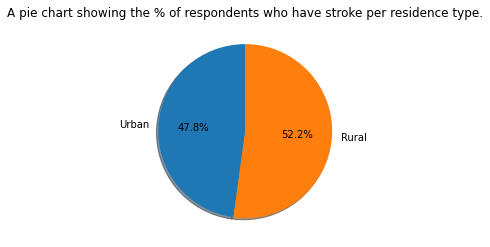

In [25]:
# Creating a pie chart that illustrates the number of people in each residence that have stroke

# Filtering out the 'Yes' value from column residence
stroke = healthdata[healthdata['stroke']== 1]

explode = (0,0)
p = stroke.groupby('residence_type')['stroke'].count()

labels = healthdata['residence_type'].unique()

plt.title('A pie chart showing the % of respondents who have stroke per residence type.')
plt.pie(p,labels=labels,explode=explode,autopct='%1.1f%%',startangle=90,shadow=True);

Although there isn't much of a difference between rural and urban locations, the majority of responders living in rural areas had had a stroke.

#### Bar graphs

Text(0.5, 0, 'work type')

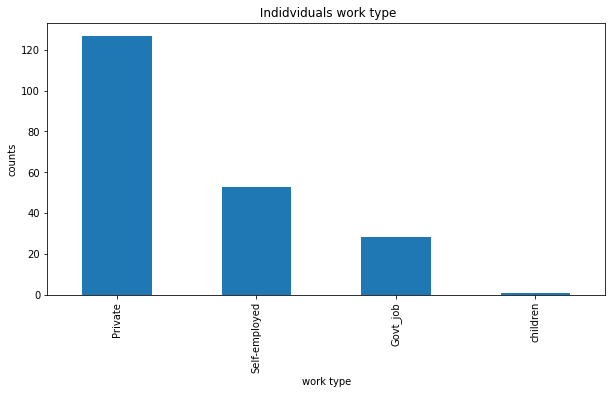

In [26]:
# Work type bar graph 

plt.figure(figsize=(10,5))
stroke['work_type'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title(' Indidviduals work type')
plt.xlabel('work type')

A higher % of people working in private sector were diagnosed with stroke.

Text(0.5, 0, 'smoking status')

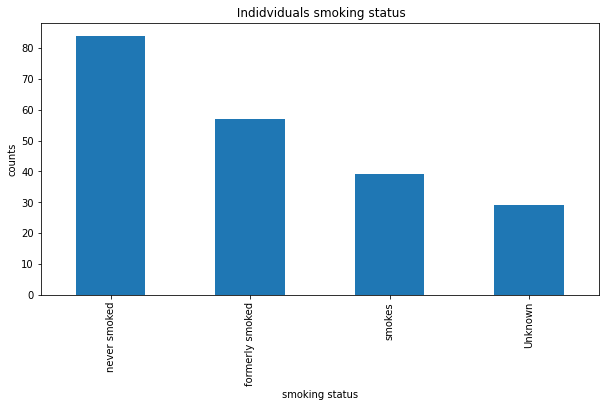

In [27]:
# Smoking status bar graph
plt.figure(figsize=(10,5))
stroke['smoking_status'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title(' Indidviduals smoking status')
plt.xlabel('smoking status')

Most of the respondents who never smoked had stroke.

#### Histograms

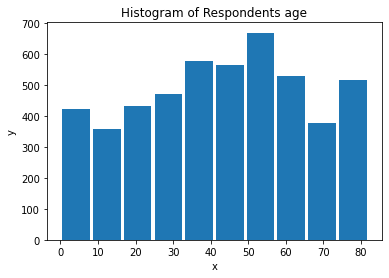

In [28]:
# Creating a histogram of respondents age
age = healthdata['age']

plt.hist(age, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Respondents age') 
plt.show()

#### Measure of central tendency

In [29]:
healthdata.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


Mean


In [30]:
# Finding mean of the columns
print("The average of age is:",healthdata.age.mean())
print("The average of glucose level is:", healthdata.avg_glucose_level.mean())
print("The average of Bmi is:",healthdata.bmi.mean())

The average of age is: 42.868810105949485
The average of glucose level is: 105.29740220048868
The average of Bmi is: 28.894559902200502


Median

In [31]:
print("The median of age is:",healthdata.age.median())
print("The median of glucose level is:", healthdata.avg_glucose_level.median())
print("The median of Bmi is:",healthdata.bmi.median())

The median of age is: 44.0
The median of glucose level is: 91.68
The median of Bmi is: 28.1


Mode

In [32]:
print("The mode of age is:",healthdata.age.mode())

The mode of age is: 0    57.0
1    78.0
dtype: float64


In [33]:
print("The mode of glucose level is:", healthdata.avg_glucose_level.mode())

The mode of glucose level is: 0    93.88
dtype: float64


In [34]:
print("The mode of bmi is:",healthdata.bmi.mode())

The mode of bmi is: 0    28.7
dtype: float64


#### Measures of dispersion

Range




In [35]:
# Range of the age
age_max = healthdata['age'].max()
age_min = healthdata['age'].min()

age_range = age_max - age_min

print(age_max,age_min)
print(age_range)

82.0 0.08
81.92


In [36]:
# Range of the glucose leve;
age_max = healthdata.avg_glucose_level.max()
age_min = healthdata.avg_glucose_level.min()

age_range = age_max - age_min

print(age_max,age_min)
print(age_range)

271.74 55.12
216.62


In [37]:
# Range of the bmi;
age_max = healthdata.bmi.max()
age_min = healthdata.bmi.min()

age_range = age_max - age_min

print(age_max,age_min)
print(age_range)

97.6 10.3
87.3


Quantile

In [38]:
# Quantiles of the age,glucose level,bmi

print("Age:",healthdata.age.quantile([0.25,0.5,0.75]))


Age: 0.25    25.0
0.50    44.0
0.75    60.0
Name: age, dtype: float64


In [39]:
print("Glucose:",healthdata.avg_glucose_level.quantile([0.25,0.5,0.75]))


Glucose: 0.25     77.0675
0.50     91.6800
0.75    113.4950
Name: avg_glucose_level, dtype: float64


In [40]:
print("BMI:",healthdata.bmi.quantile([0.25,0.5,0.75]))

BMI: 0.25    23.5
0.50    28.1
0.75    33.1
Name: bmi, dtype: float64


Standard deviation

In [41]:
# Standard Deviation of the age,glucose level,bmi

print("Age:",healthdata.age.std())
print("Glucose:",healthdata.avg_glucose_level.std())
print("BMI:",healthdata.bmi.std())

Age: 22.556127929310982
Glucose: 44.42555018990281
BMI: 7.854319913144661


Variance

In [42]:
# Variance of the age,bmi,glucoselevel

print("Age:",healthdata.age.var())
print("Glucose",healthdata.avg_glucose_level.var())
print("BMI",healthdata.bmi.var())

Age: 508.77890716344285
Glucose 1973.6295096755732
BMI 61.690341298020755


Skewness

In [43]:
# Skewness of the age,BBMI,glucose

print("Age:",healthdata.age.skew())
print("Glucose",healthdata.avg_glucose_level.skew())
print("BMI",healthdata.bmi.skew())

Age: -0.11944974553359676
Glucose 1.6146189548397685
BMI 1.055062949042646


- The age distribution is negatively skewed(left skewed).
- The Glucose and BMI distribution is positively skewed(Right skewed)

Kurtosis

In [44]:
# Kurtosis of the age,BMI, Glucose
print("Age:",healthdata.age.kurt())
print("Glucose",healthdata.avg_glucose_level.kurt())
print("BMI",healthdata.bmi.kurt())

Age: -0.9880330634410388
Glucose 1.9070846801022832
BMI 3.3623297157988485


- The glucose and Bmi distributions are highly peaked.
- The BMI distribution has heavier tail distribution than age and Glucose level.

### Bivariate Analysis

#### Numericals

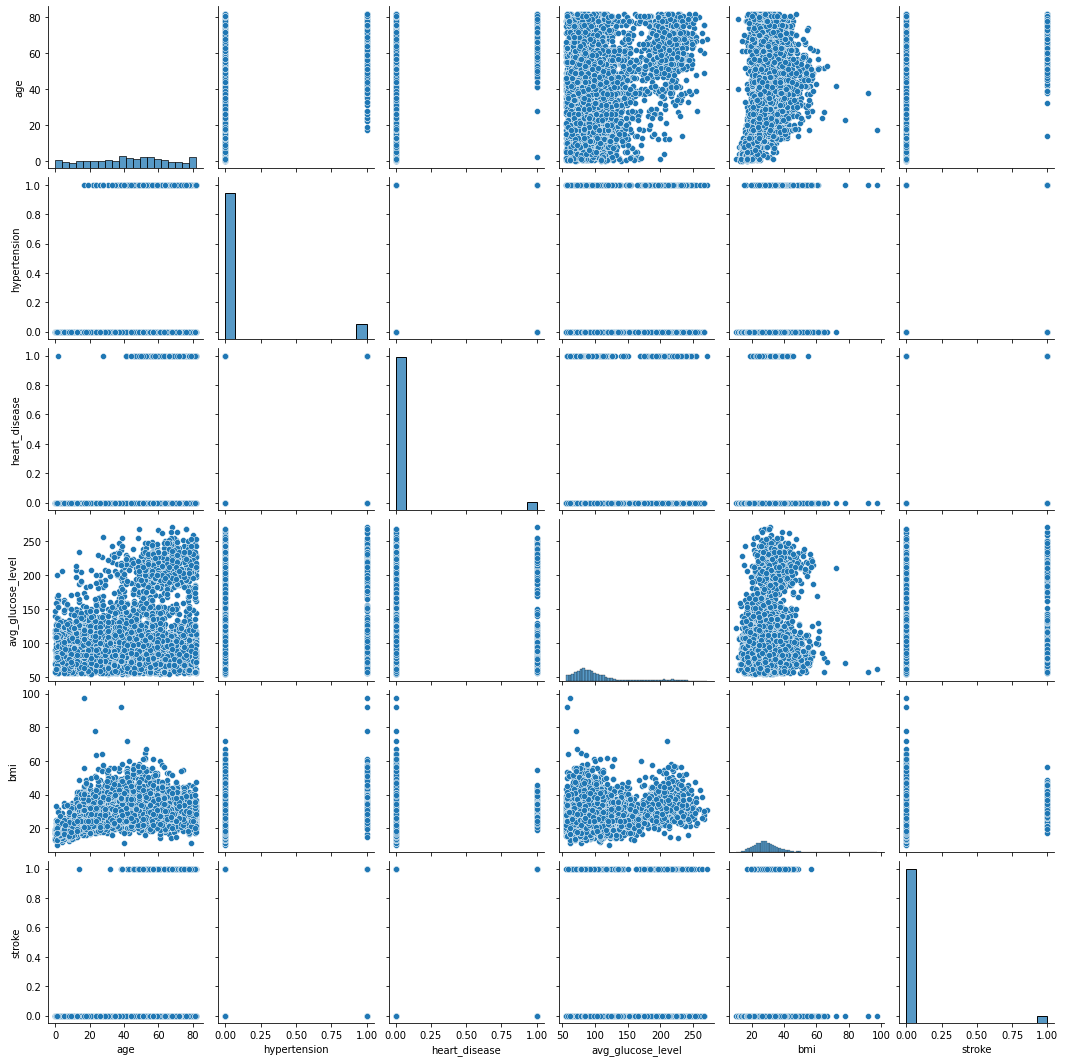

In [45]:
sns.pairplot(healthdata)
plt.show()
##this shows that there is relationship between the numericals

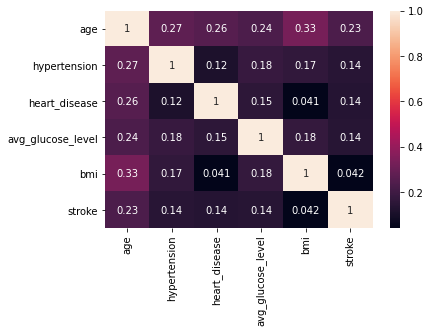

In [46]:
sns.heatmap(healthdata.corr(), annot=True)
plt.show()
##it clearly show how the numerical data have relationship

In [47]:
# Calculating the pearson coefficient
pearson_coeff = healthdata['age'].corr(healthdata['bmi'], method="pearson") 
print(pearson_coeff)

#It shows positive correlation, there is a relationship

0.33331421806774447


In [48]:
pearson_coeff = healthdata['age'].corr(healthdata['stroke'], method="pearson") 
print(pearson_coeff)
#It shows week positive correlation, there is a relationship

0.2323130131306692


#### Categorical

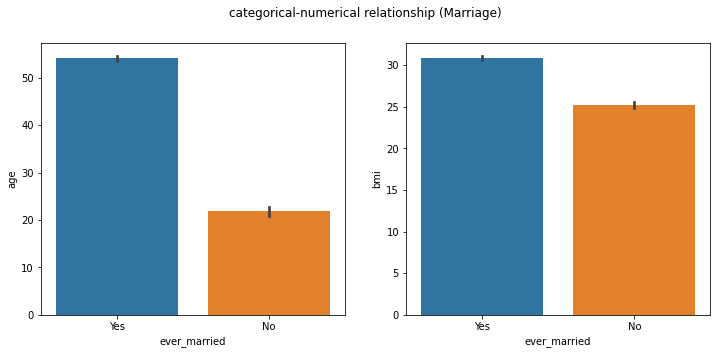

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship (Marriage)')
sns.barplot(x=healthdata['ever_married'], y= healthdata['age'], ax=ax1)
sns.barplot(x=healthdata['ever_married'], y= healthdata['bmi'], ax=ax2)
plt.show();
# Those who are married have higher average age and BMI than those who are not,

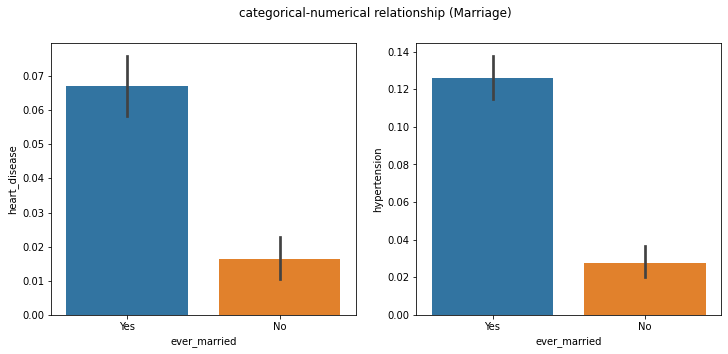

In [50]:

fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship (Marriage)')
sns.barplot(x=healthdata['ever_married'], y= healthdata['heart_disease'], ax=ax1)
sns.barplot(x=healthdata['ever_married'], y= healthdata['hypertension'], ax=ax2)
plt.show();
# Those who are married are at a higher risk of getting heart diseases and hypertension than those who are not. 

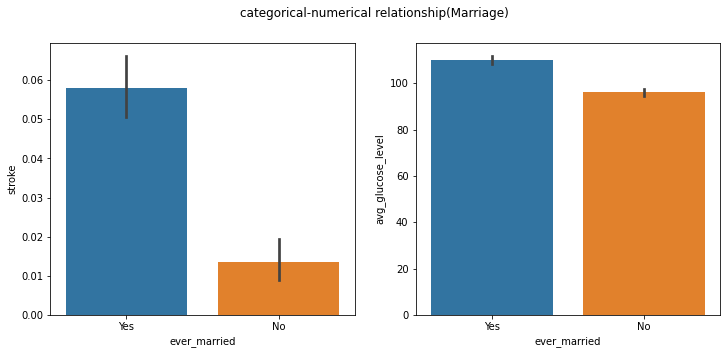

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship(Marriage)')
sns.barplot(x=healthdata['ever_married'], y= healthdata['stroke'], ax=ax1)
sns.barplot(x=healthdata['ever_married'], y= healthdata['avg_glucose_level'], ax=ax2)
plt.show();
# Those who are married are at a higher risk of getting stroke than those who are not, also their BMI level 
#is a bit higher.

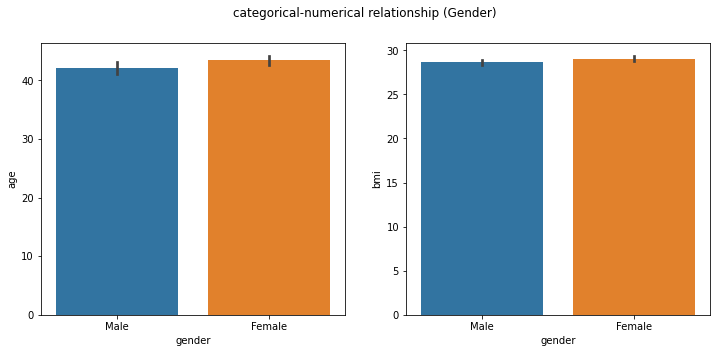

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship (Gender)')
sns.barplot(x=healthdata['gender'], y=healthdata['age'], ax=ax1)
sns.barplot(x=healthdata['gender'], y=healthdata['bmi'], ax=ax2)
plt.show();
# The average age of the 'other' gender is 28 with also the lowest BMI.

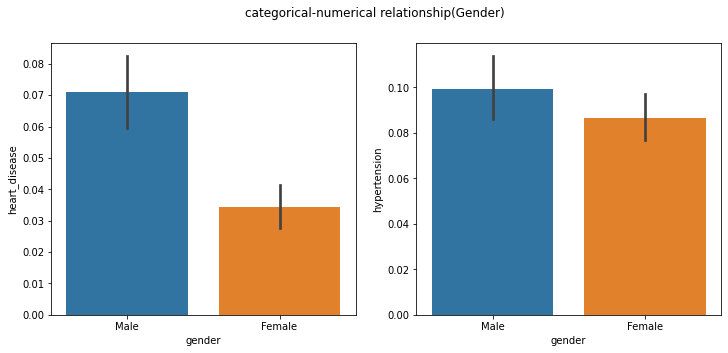

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship(Gender)')
sns.barplot(x=healthdata['gender'], y=healthdata['heart_disease'], ax=ax1)
sns.barplot(x=healthdata['gender'], y=healthdata['hypertension'], ax=ax2)
plt.show();
#more males have heart disease and hypertension than the females.

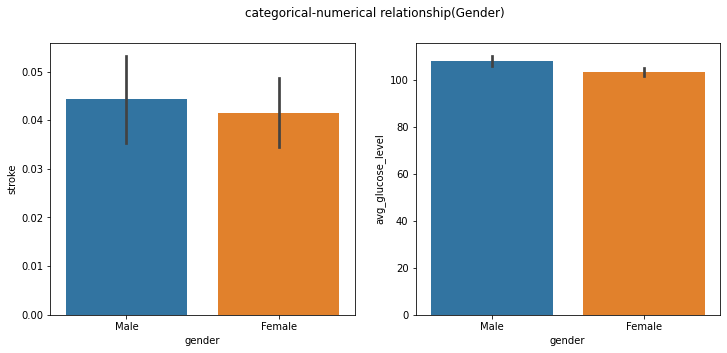

In [54]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship(Gender)')
sns.barplot(x=healthdata['gender'], y=healthdata['stroke'], ax=ax1)
sns.barplot(x=healthdata['gender'], y=healthdata['avg_glucose_level'], ax=ax2)
plt.show()
#on stroke level, both gender are almost on same level but the males are slightly higher.
#both male and females have almost same glucose level but the other gender is slightly higher.

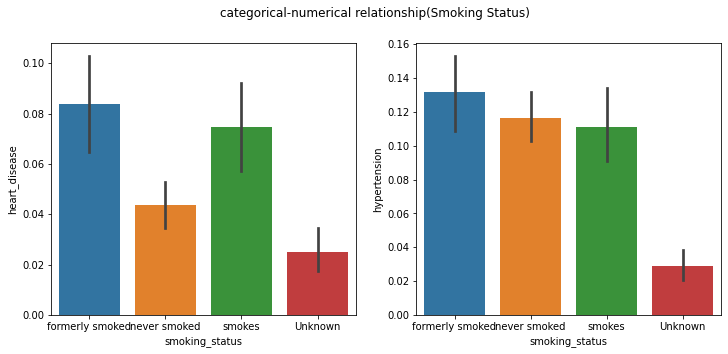

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship(Smoking Status)')
sns.barplot(x=healthdata['smoking_status'], y=healthdata['heart_disease'], ax=ax1)
sns.barplot(x=healthdata['smoking_status'], y=healthdata['hypertension'], ax=ax2)
plt.show();

# Both of those who formerly smoked and those who are currently smoking are more prone to heart disease. 
# Hypertension cases is higher for people whoforlmaly smoked. those who never smoked are at higher risk of 
# getting hyertension that those who are smoking

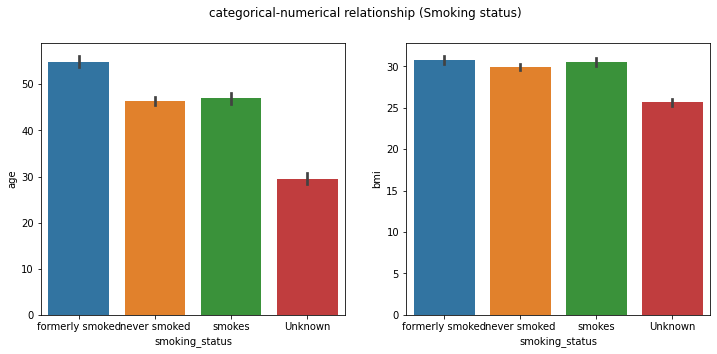

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship (Smoking status)')
sns.barplot(x=healthdata['smoking_status'], y=healthdata['age'], ax=ax1)
sns.barplot(x=healthdata['smoking_status'], y=healthdata['bmi'], ax=ax2)
plt.show();
# Average age of people who smoke is 55 while those who dont smoke share same avarage age with those who 
# smokes at 45.

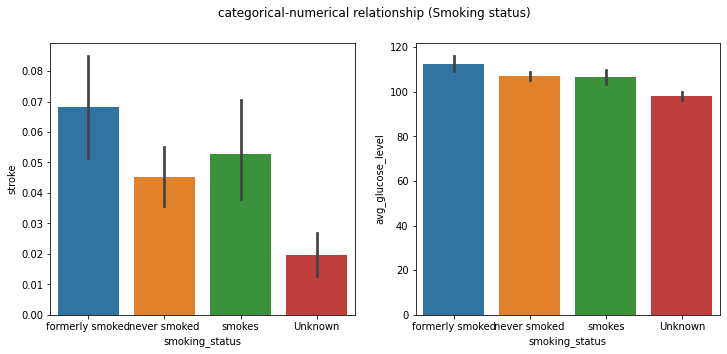

In [57]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship (Smoking status)')
sns.barplot(x=healthdata['smoking_status'], y=healthdata['stroke'], ax=ax1)
sns.barplot(x=healthdata['smoking_status'], y=healthdata['avg_glucose_level'], ax=ax2)
plt.show();
#People who formerly smoked are at higher risk of stroke, there is no much difference between people who 
#smoke and those who dont 

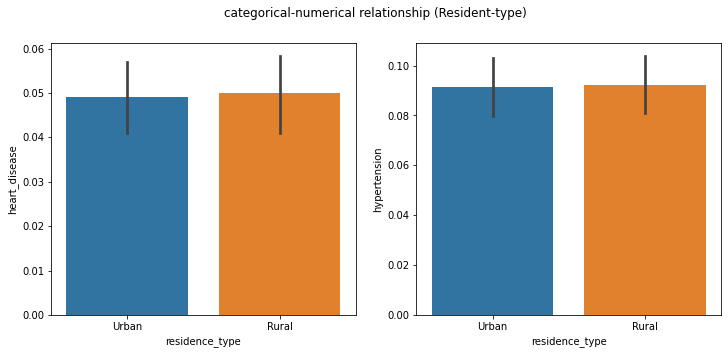

In [58]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship (Resident-type)')
sns.barplot(x=healthdata['residence_type'], y=healthdata['heart_disease'], ax=ax1)
sns.barplot(x=healthdata['residence_type'], y=healthdata['hypertension'], ax=ax2)
plt.show();
# Average heart disease and hypertension is almost same on people who live both in rural or urban areas.

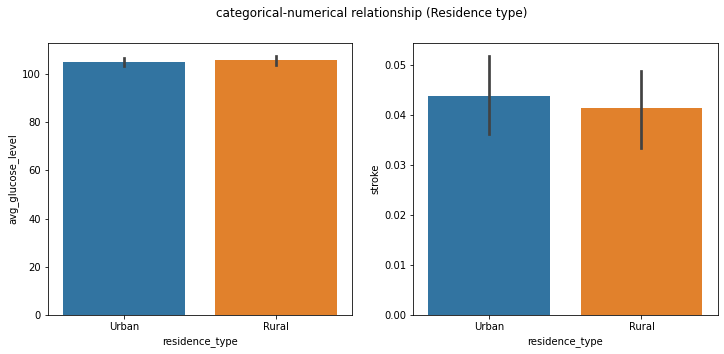

In [59]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship (Residence type)')
sns.barplot(x=healthdata['residence_type'], y=healthdata['avg_glucose_level'], ax=ax1)
sns.barplot(x=healthdata['residence_type'], y=healthdata['stroke'], ax=ax2)
plt.show();
# Urban people are prone more to stroke than their rural counterparts.

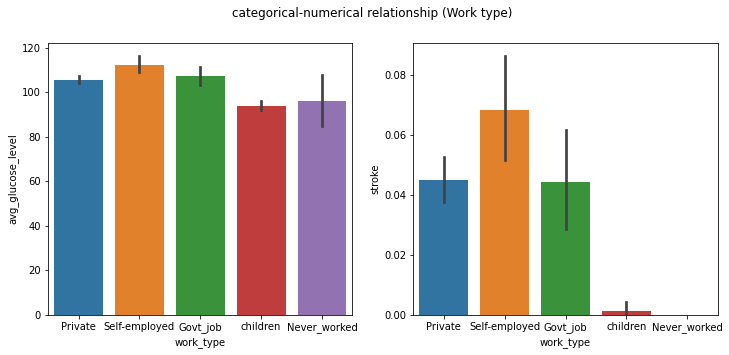

In [60]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship (Work type)')
sns.barplot(x=healthdata['work_type'], y=healthdata['avg_glucose_level'], ax=ax1)
sns.barplot(x=healthdata['work_type'], y=healthdata['stroke'], ax=ax2)
plt.show();
# All work type have almost the same glucose level but self employed people are affected more by stroke.

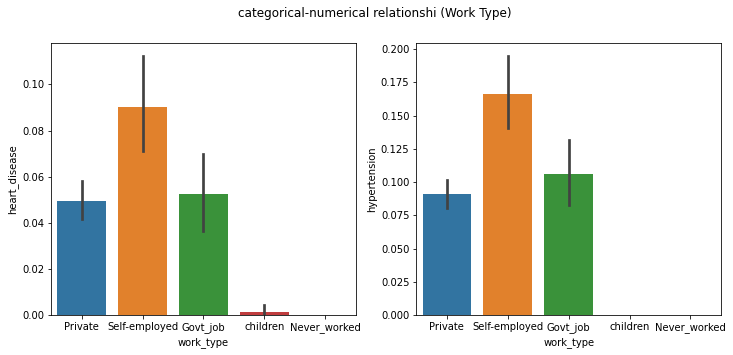

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationshi (Work Type)')
sns.barplot(x=healthdata['work_type'], y=healthdata['heart_disease'], ax=ax1)
sns.barplot(x=healthdata['work_type'], y=healthdata['hypertension'], ax=ax2)
plt.show();
# Self employed people have higher number in heart disease and hypertension.

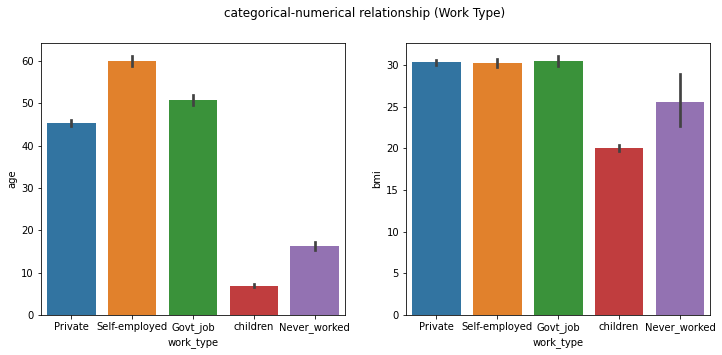

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 5))
fig.suptitle('categorical-numerical relationship (Work Type)')
sns.barplot(x=healthdata['work_type'], y=healthdata['age'], ax=ax1)
sns.barplot(x=healthdata['work_type'], y=healthdata['bmi'], ax=ax2)
plt.show();
# Average age of self-employed is higher compared to the other work types. As expected the BMI of children is the lowest followed by people who never worked.

### Tests on Bivariate Analysis

#### Gender and stroke

In [63]:
pd.crosstab(healthdata['stroke'],healthdata['gender'],margins=True,margins_name='Total')

gender,Female,Male,Total
stroke,,,
0,2777,1922,4699
1,120,89,209
Total,2897,2011,4908


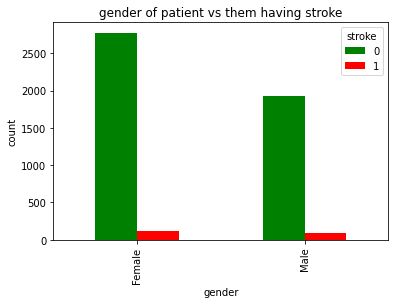

In [101]:
color=['g','r']
pd.crosstab(healthdata['gender'],healthdata['stroke']).plot(kind='bar',color=color)
plt.title('gender of patient vs them having stroke')
plt.ylabel('count')
plt.show()

We can see that more females suffered from stroke

we will perform a chi squared test, to accertain if the gender of a person can influence if someone had stroke or not

In [65]:
stats.chi2_contingency(pd.crosstab(healthdata['stroke'],healthdata['gender']))
#from the results above, we can see that this test did not have accurate results. This is because of the imbalance in the gender column

(0.16955129804441268,
 0.6805108914997836,
 1,
 array([[2773.63549307, 1925.36450693],
        [ 123.36450693,   85.63549307]]))

From the chi test, we can see that the gender does not determine if someone has stroke or not

#### Hypertension and stroke

In [66]:
pd.crosstab(healthdata['stroke'],healthdata['hypertension'],margins=True,margins_name='Total')

hypertension,0,1,Total
stroke,,,
0,4308,391,4699
1,149,60,209
Total,4457,451,4908


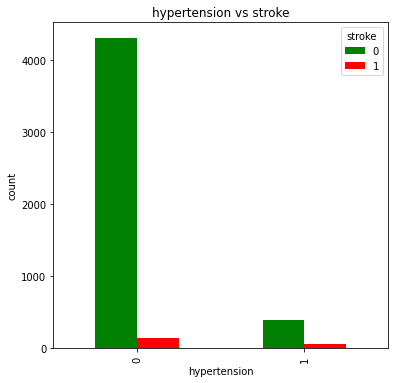

In [105]:
color=['g','r']
pd.crosstab(healthdata['hypertension'],healthdata['stroke']).plot(kind='bar',figsize=(6,6),color=color)
plt.ylabel('count')
plt.title('hypertension vs stroke')
plt.show()

From the plot above, we can see that most people who suffered from stroke, they had hypertension related issues

To test this, we perform a chi-squared test

In [68]:
stats.chi2_contingency(pd.crosstab(healthdata['stroke'],healthdata['hypertension']))

(97.23918231192063,
 6.143875464115642e-23,
 1,
 array([[4267.20517522,  431.79482478],
        [ 189.79482478,   19.20517522]]))

From the test, the chi- statistic is 97.2

the p-value is less than 0.05

this can be interpreted to mean that there is a relationship btwn hypertension and someone suffering from stroke

#### Heart Disease and Stroke

In [69]:
pd.crosstab(healthdata['heart_disease'],healthdata['stroke'],margins=True,margins_name='Total')

stroke,0,1,Total
heart_disease,,,
0,4496,169,4665
1,203,40,243
Total,4699,209,4908


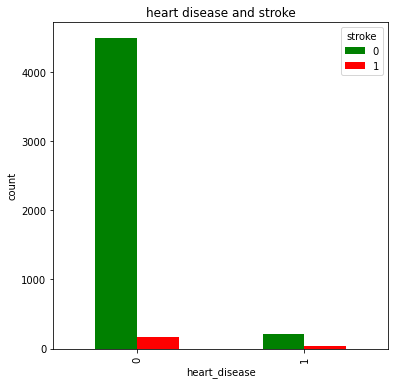

In [109]:
color=['g','r']
pd.crosstab(healthdata['heart_disease'],healthdata['stroke']).plot(kind='bar',figsize=(6,6),color=color)
plt.title('heart disease and stroke')
plt.ylabel('count')
plt.show()

From the bar plot above, we can see that most people who had stroke, also had heart related issues.

To prove this, we will use the chi-squared test

In [71]:
stats.chi2_contingency(pd.crosstab(healthdata['heart_disease'],healthdata['stroke']))

(90.24989255123297,
 2.0990170036138994e-21,
 1,
 array([[4466.34779951,  198.65220049],
        [ 232.65220049,   10.34779951]]))

from the results above, the chi statistic is 90

the p-value is less than the required 0.05 threshold

this can be interpred to mean that the heart related issues also can be influence someone having a stroke

#### ever married and stroke

In [72]:
pd.crosstab(healthdata['ever_married'],healthdata['stroke'],margins=True,margins_name='Total')

stroke,0,1,Total
ever_married,,,
No,1681,23,1704
Yes,3018,186,3204
Total,4699,209,4908


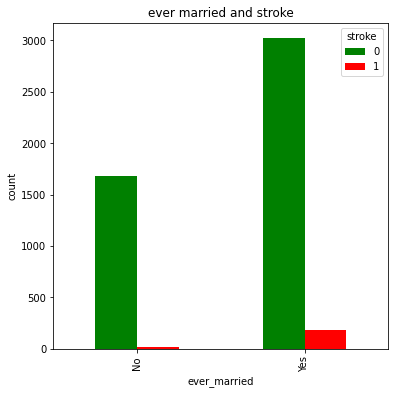

In [107]:
color=['g','r']
pd.crosstab(healthdata['ever_married'],healthdata['stroke']).plot(kind='bar',figsize=(6,6),color=color)
plt.title('ever married and stroke')
plt.ylabel('count')
plt.show()

From the plot above, we can see that most people who had stoke were married or have ever been married.

But the majority of the respondents who we either married or not were not suffering from stroke

We conduct a chi-squared test

In [74]:
stats.chi2_contingency(pd.crosstab(healthdata['ever_married'],healthdata['stroke']))

(53.07579109223565,
 3.2092342416320797e-13,
 1,
 array([[1631.43765281,   72.56234719],
        [3067.56234719,  136.43765281]]))

from the test above, the p-value is less than 0.05

this means that we can easily reject the null hypothesis

this can be intepred to mean that the marital status can have an influence on someone having stroke or not

#### work type and stroke

In [75]:
pd.crosstab(healthdata['work_type'],healthdata['stroke'],margins=True,margins_name='Total')

stroke,0,1,Total
work_type,,,
Govt_job,602,28,630
Never_worked,22,0,22
Private,2683,127,2810
Self-employed,722,53,775
children,670,1,671
Total,4699,209,4908


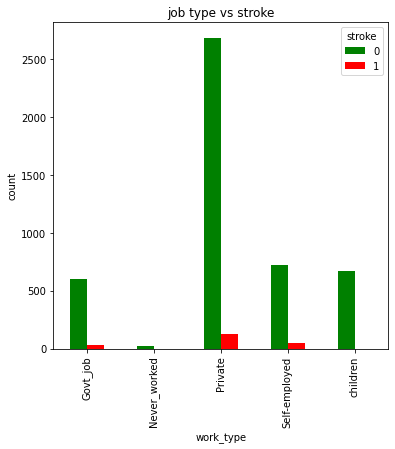

In [111]:
color=['g','r']
pd.crosstab(healthdata['work_type'],healthdata['stroke']).plot(kind='bar',figsize=(6,6),color=color)
plt.title('job type vs stroke')
plt.ylabel('count')
plt.show()

we can see that most people who suffered from stroke were in the private sector then followed by self-employed people.

We will conduct a chi-squared test to accertain if work type can have an influence to someone stroke or not

In [77]:
stats.chi2_contingency(pd.crosstab(healthdata['work_type'],healthdata['stroke']))

(41.95098747365517,
 1.7076444710201084e-08,
 4,
 array([[6.03172372e+02, 2.68276284e+01],
        [2.10631622e+01, 9.36837816e-01],
        [2.69034026e+03, 1.19659739e+02],
        [7.41997759e+02, 3.30022412e+01],
        [6.42426447e+02, 2.85735534e+01]]))

from the test results above, we can see that the p-value is less than 0.05

because of this we can reject the null hypothesis

this can be interpreted to mean that the work type of an individual can influence whether they have stroke or not

#### Residence and Stroke

In [78]:
pd.crosstab(healthdata['residence_type'],healthdata['stroke'],margins=True,margins_name='Total')

stroke,0,1,Total
residence_type,,,
Rural,2318,100,2418
Urban,2381,109,2490
Total,4699,209,4908


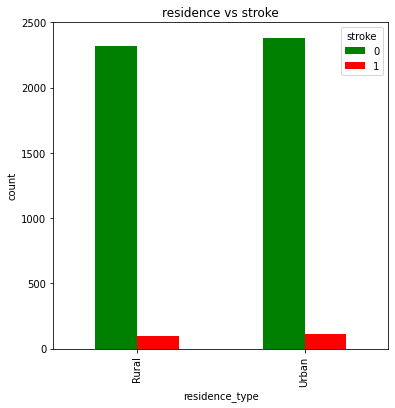

In [112]:
color=['g','r']
pd.crosstab(healthdata['residence_type'],healthdata['stroke']).plot(kind='bar',figsize=(6,6),color=color)
plt.title('residence vs stroke')
plt.ylabel('count')
plt.show()

from the plot,we can see that the number of people who have stroke in both urban and rural areas is almost the same

We will carry out a chi-squared test to accertain if residency can influence someone to having stoke or not

In [80]:
stats.chi2_contingency(pd.crosstab(healthdata['residence_type'],healthdata['stroke']))

(0.12168638903015402,
 0.7272126134406378,
 1,
 array([[2315.03300733,  102.96699267],
        [2383.96699267,  106.03300733]]))

from the results above, we can see that the p-value is greater than 0.05

because of this we fail to reject the null hypothesis

This is interpreted to mean that residency and someone having stoke are not related

#### Smoking Status and Stroke

In [81]:
pd.crosstab(healthdata['smoking_status'],healthdata['stroke'],margins=True,margins_name='Total')

stroke,0,1,Total
smoking_status,,,
Unknown,1454,29,1483
formerly smoked,779,57,836
never smoked,1768,84,1852
smokes,698,39,737
Total,4699,209,4908


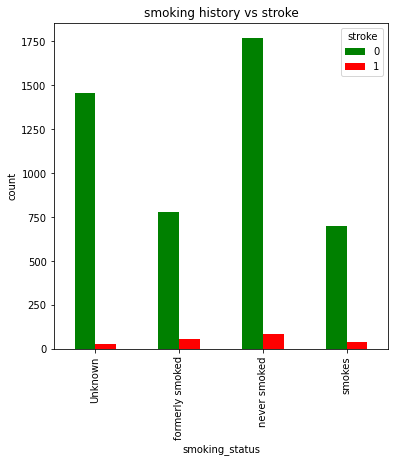

In [113]:
color=['g','r']
pd.crosstab(healthdata['smoking_status'],healthdata['stroke']).plot(kind='bar',figsize=(6,6),color=color)
plt.ylabel('count')
plt.title('smoking history vs stroke')
plt.show()

from the plot above, we can see an interesting observation, that majority of the people who suffered from stroke had never smoked.

we perfrom a chi squared test to accertain if smoking habits can influence someone to having stroke

In [83]:
stats.chi2_contingency(pd.crosstab(healthdata['smoking_status'],healthdata['stroke']))

(35.00610957091103,
 1.2146342910949484e-07,
 3,
 array([[1419.84861451,   63.15138549],
        [ 800.400163  ,   35.599837  ],
        [1773.13528932,   78.86471068],
        [ 705.61593317,   31.38406683]]))

From the test results above, we can see that the p-value is less than 0.05

This means that the null hypothesis can be rejected

This can be interpred to mean that the smoking habits of an indivdual can have an influence on whether they will have stroke or not

### Multivariate Analysis

In [84]:
# preview data set
healthdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [85]:
# Separating numerical and categorical columns
ob = healthdata.select_dtypes(include ="object")
num = healthdata.select_dtypes(exclude="object")

In [86]:
# creating dummy variable for categorical columns
dummies = pd.get_dummies(ob,drop_first=True)
final_healthdata = pd.concat([dummies,num],axis=1)

In [87]:
# separating labels and features
X = final_healthdata.drop('stroke',axis=1)
y = final_healthdata['stroke']

In [88]:
# Importing and running model selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [89]:
# importing standard scaler
from sklearn.preprocessing  import StandardScaler

In [90]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
# importing and running LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [92]:
# performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[1400    1]
 [  72    0]]
Accuracy0.9504412763068567


## Sampling


We are interested in the gae of people who suffered from stroke

We will first filter their records

In [93]:
sufferedstoke=healthdata[healthdata['stroke']==1]
sufferedstoke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [94]:
sufferedstoke.shape

(209, 11)

We will create a proportionate stratified sample using our age column. Our sample size will be 50% of our total population, i.e 105 entries. 

In [95]:
# We are going to appliy a function that puts each subset into a random sample with a size of 245 while strictly maintaining the population's proportions.

# Stratified sample
healthdata_sample = sufferedstoke.groupby('age', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.5))

# proportion of the non_stratified sample
print(healthdata_sample['age'].value_counts())

# Check the stratified output
print(healthdata_sample)

80.0    8
78.0    8
81.0    7
79.0    6
57.0    5
82.0    4
77.0    4
63.0    4
74.0    4
68.0    4
70.0    3
69.0    3
59.0    3
54.0    3
60.0    2
56.0    2
50.0    2
58.0    2
49.0    2
45.0    2
51.0    2
39.0    2
61.0    2
66.0    2
67.0    2
71.0    2
72.0    2
73.0    2
75.0    2
76.0    2
65.0    1
55.0    1
53.0    1
52.0    1
48.0    1
64.0    1
Name: age, dtype: int64
     gender   age  hypertension  ...   bmi   smoking_status stroke
228  Female  39.0             0  ...  29.6           smokes      1
49   Female  39.0             1  ...  39.2           smokes      1
113  Female  45.0             0  ...  56.6     never smoked      1
63   Female  45.0             0  ...  30.2  formerly smoked      1
34     Male  48.0             0  ...  29.7     never smoked      1
..      ...   ...           ...  ...   ...              ...    ...
220    Male  81.0             1  ...  28.1           smokes      1
23     Male  82.0             0  ...  32.5          Unknown      1
42     Male  

## Hypothesis Testing

Hypothesis

H0 : Mean Age of Stroke Patients is equal to worlds life expectancy rate

H1 : Mean age of Stroke Patients is not equal to the worlds life expectancy rate

To do this hypothesis, We will have to look if the assumptions on the data are in place

- Dependnent variable is continous
- Dependnent variable should be approximately normally distributed
- There should be no significant outliers

statistics for the age of stroke patients

In [96]:
meanageofstroke=healthdata_sample['age'].mean()
standard_deviation_of_stroke_patients_age=healthdata_sample['age'].std()
global_life_expectancy_rate=72.6

print('mean age of stroke patients :',healthdata_sample['age'].mean())
print('standard deviation of stroke patients age',healthdata_sample['age'].std())
print('kurtosis of age of stroke patients',healthdata_sample['age'].kurt())
print('skewness of age of stroke patients',healthdata_sample['age'].skew())
print('global life expectancy rate :',global_life_expectancy_rate)

mean age of stroke patients : 68.04807692307692
standard deviation of stroke patients age 11.438633063568279
kurtosis of age of stroke patients -0.7131113024650362
skewness of age of stroke patients -0.5996829827962852
global life expectancy rate : 72.6


Distribution of age of stroke patients

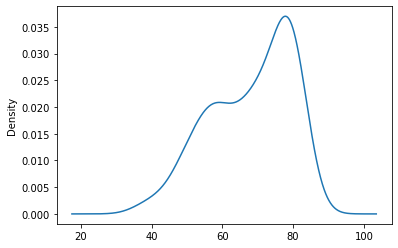

In [97]:
healthdata_sample['age'].plot(kind='kde')
plt.show()

- The column age is not normally distrbuted
- We will conduct the shapiro wilk test to test for normality

In [98]:
from scipy.stats import shapiro
stats,p=shapiro(healthdata_sample['age'])
print('statistics=%.3f,p=%.3f'%(stats,p))

#decision rule
alpha=0.05
if p<alpha:
  print('reject null hypothesis that the data is normally distributed')
else: 
  print('data is normally distributed')

statistics=0.915,p=0.000
reject null hypothesis that the data is normally distributed


- from the shapiro wilk test, we confirm that the age is not normally distributed.
- we will transform it into normall distribution by taking the log of age

In [99]:
import scipy.stats as stats

# Perform one sample t-test
stats.ttest_1samp(healthdata_sample['age'], popmean=72.6)

Ttest_1sampResult(statistic=-4.058237459776266, pvalue=9.644972567471915e-05)

Since the p-value is less than the required threshold, we reject the null hypothesis